## Imports 

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from ggplot import *
from matplotlib import pyplot as plt

%matplotlib inline

/home/captain_eli/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df_07 = pd.read_csv('2007.csv')
df_08 = pd.read_csv('2008.csv')
df_09 = pd.read_csv('2009.csv')
df_10 = pd.read_csv('2010.csv')
df_11 = pd.read_csv('2011.csv')
df_12 = pd.read_csv('2012.csv')
df_13 = pd.read_csv('2013.csv')
df_14 = pd.read_csv('2014.csv')
df_15 = pd.read_csv('2015.csv')
df_16 = pd.read_csv('2016.csv')

df = pd.concat([df_07, df_08, df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16])

#### Turn our string dates into datetime objects

In [3]:
def make_datetime(group_starts_object):
    return datetime.datetime.strptime(group_starts_object, "%Y-%m-%d %H:%M:%S")

#### Remove the extra characters from column names

In [4]:
def shorten_column_titles(columns):
    new_titles = []
    for column_title in columns:
        column_title = column_title[6:]
        new_titles.append(column_title) 
    return new_titles
        
df.columns = shorten_column_titles(df.columns)

#### Change the index to datetimes, delete the old "group starts" column

In [5]:
df.index = df.Starts.apply(make_datetime)
date_series = df.index
del df['Starts']

####  Make lists of column which will help in extracting key columns later on

In [59]:
delays = []
volumes = []
queue_lengths = []

norths = []
souths = []

cars = []
nexus = []

def make_groups(columns): 
    for c_name in columns:
        if "North" in c_name:
            norths.append(c_name)
        else:
            souths.append(c_name)
            
        if "Cars" in c_name:
            cars.append(c_name)
        if "NEXUS" in c_name:
            nexus.append(c_name)
            
        if "Delay" in c_name:
            delays.append(c_name)
        elif "Queue Length" in c_name:
            queue_lengths.append(c_name)
        elif "Volume" in c_name:
            volumes.append(c_name)
            
make_groups(df)

## Start Grouping  

### Manual Cleaning

In [7]:
def get_df_from_mutual_columns(df, column_list):
    good_cols = []
    for column in df.columns:
        if column in column_list:
            good_cols.append(column)
    return df[good_cols]

In [8]:
volumes_by_day = df.groupby([df.index.year, df.index.month, df.index.day])[volumes].sum()
volumes_by_day.reset_index(inplace=True)

In [9]:
car_volumes_by_day = get_df_from_mutual_columns(volumes_by_day, cars)
north_car_volumes_by_day = get_df_from_mutual_columns(car_volumes_by_day, norths)
north_car_volumes_by_day['Count'] = north_car_volumes_by_day.count(axis=1,numeric_only=True)

south_car_volumes_by_day = get_df_from_mutual_columns(car_volumes_by_day, souths)
south_car_volumes_by_day['Count'] = south_car_volumes_by_day.count(axis=1,numeric_only=True)

/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
north_car_volumes_by_day.index = pd.date_range('2007-01-01', '2016-01-12', freq='D')
south_car_volumes_by_day.index = pd.date_range('2007-01-01', '2016-01-12', freq='D')

In [11]:
selective_north_car_volumes_by_day = north_car_volumes_by_day.ix[north_car_volumes_by_day['Count']>= 4]
selective_south_car_volumes_by_day = south_car_volumes_by_day.ix[south_car_volumes_by_day['Count']>= 4]

In [12]:
del selective_north_car_volumes_by_day['Count']
del selective_south_car_volumes_by_day['Count']

In [13]:
def make_low_values_disappear(df, cols):
    for col in cols:
        df_t = df
        df_t.ix[df_t[col]<= 10, [col]] = np.nan

make_low_values_disappear(selective_north_car_volumes_by_day, selective_north_car_volumes_by_day.columns)
make_low_values_disappear(selective_south_car_volumes_by_day, selective_south_car_volumes_by_day.columns)

/home/captain_eli/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
selective_north_car_volumes_by_day.dropna(inplace=True)
selective_south_car_volumes_by_day.dropna(inplace=True)
print

/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
selective_north_car_volumes_by_day['Sum'] = selective_north_car_volumes_by_day.sum(axis=1)
selective_south_car_volumes_by_day['Sum'] = selective_south_car_volumes_by_day.sum(axis=1)

/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
north_mean = selective_north_car_volumes_by_day.groupby([selective_north_car_volumes_by_day.index.month, selective_north_car_volumes_by_day.index.day])['Sum'].mean()
north_std = selective_north_car_volumes_by_day.groupby([selective_north_car_volumes_by_day.index.month, selective_north_car_volumes_by_day.index.day])['Sum'].std()

north_means_and_stds_df = pd.DataFrame([north_mean, north_std], index=['Mean', 'STD'])
north_means_and_stds_df = north_means_and_stds_df.T

In [17]:
south_mean = selective_south_car_volumes_by_day.groupby([selective_south_car_volumes_by_day.index.month, selective_south_car_volumes_by_day.index.day])['Sum'].mean()
south_std = selective_south_car_volumes_by_day.groupby([selective_south_car_volumes_by_day.index.month, selective_south_car_volumes_by_day.index.day])['Sum'].std()

south_means_and_stds_df = pd.DataFrame([south_mean, south_std], index=['Mean', 'STD'])
south_means_and_stds_df = south_means_and_stds_df.T

In [18]:
1886702.101951685 vs 888656.7812980331

SyntaxError: invalid syntax (<ipython-input-18-54422b606436>, line 1)

In [ ]:
south_means_and_stds_df.plot()

In [ ]:
north_means_and_stds_df['Mean MA'] = pd.rolling_mean(north_means_and_stds_df['Mean'], 7)
south_means_and_stds_df['Mean MA'] = pd.rolling_mean(south_means_and_stds_df['Mean'], 7)

In [ ]:
south_means_and_stds_df = pd.concat([south_means_and_stds_df[:59], south_means_and_stds_df[60:]])

In [ ]:
north_means_and_stds_df.index = pd.date_range('2015-01-01', '2015-12-31', freq='D')
south_means_and_stds_df.index = pd.date_range('2015-01-01', '2015-12-31', freq='D')

## Start Visualizing

In [ ]:
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_ticks = ['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', 
           '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', ]

In [ ]:
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_ticks = ['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', 
           '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', ]

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16,12))
    plt.plot(north_means_and_stds_df['Mean'], 'bo')
    plt.plot(south_means_and_stds_df['Mean'], 'ro')
    plt.plot(north_means_and_stds_df['Mean MA'], 'b', linewidth=8)
    plt.plot(south_means_and_stds_df['Mean MA'], 'r', linewidth=8)
                                               
    plt.legend(labels=['Southbound to USA', 'Northbound to Canada'])
    plt.xticks(x_ticks, labels)
    plt.show()

### Testing which direction has more traffic

In [ ]:
car_volumes_by_day_of_year = get_df_from_mutual_columns(volumes_by_day_of_year, cars)
north_car_volumes_by_day_of_year = get_df_from_mutual_columns(car_volumes_by_day_of_year, norths)
south_car_volumes_by_day_of_year = get_df_from_mutual_columns(car_volumes_by_day_of_year, souths)

total_volume_df = pd.DataFrame(index=north_car_volumes_by_day_of_year.index)
total_volume_df['Southbound Sum'] = north_car_volumes_by_day_of_year.sum(axis=1)
total_volume_df['Northbound Sum'] = south_car_volumes_by_day_of_year.sum(axis=1)
total_volume_df.index = pd.date_range('2016-01-01', '2016-12-31', freq='D')
total_volume_df['Difference'] = total_volume_df['Southbound Sum'] - total_volume_df['Northbound Sum']
total_volume_df['Difference'].mean()

In [ ]:
dif = north_means_and_stds_df['Mean'] - south_means_and_stds_df['Mean']
dif.mean()

In [ ]:
df.columns

In [ ]:
dif2 = df['Volume (Pacific Highway North Cars)'].dropna() - df['Volume (Pacific Highway South Cars)'].dropna()
dif2.sum()

## Vs Yearly Mean

In [ ]:
cars_days = get_df_from_mutual_columns(volumes_by_day, cars)
cars_days.index = pd.date_range('2007-01-01', '2016-01-12', freq='D')
cars_years = cars_days.groupby([cars_days.index.year])[cars_days.columns].mean()

In [ ]:
cols = cars_days.columns[:8].tolist()
years = cars_years.index.tolist()
my_days = cars_days.index.tolist()

In [ ]:
def year_avg_look_up(col, year):
    #print cars_years[col][year]
    return cars_years[col][year]

In [ ]:
def get_ratio(df, col, year, day):
    relevant_df = df.ix[df.index.year == year]
    relevant_series = relevant_df[col]
    return relevant_series[day] / year_avg_look_up(col, year)


def whole(in_df, cs, days):
    df_ = pd.DataFrame(index=days, columns=cs)
    
    for col in cs:
        
        for day in days:

            value = get_ratio(in_df, col, day.year, day)

            df[col][day] = value
            
    return df_

In [ ]:
whole(cars_days, cols, my_days)

## Restart

In [19]:
cars_by_day = get_df_from_mutual_columns(volumes_by_day, cars)
cars_by_day.index = pd.date_range('2007-01-01', '2016-01-12', freq='D')
cars_by_year = cars_by_day.groupby([cars_by_day.index.year])[cars_by_day.columns].mean()

In [20]:
cars_by_day.head()
cars_by_year.head()

,Volume (Lynden/Aldergrove North Cars),Volume (Lynden/Aldergrove South Cars),Volume (Pacific Highway North Cars),Volume (Pacific Highway South Cars),Volume (Peace Arch North Cars),Volume (Peace Arch South Cars),Volume (Sumas/Huntingdon North Cars),Volume (Sumas/Huntingdon South Cars)
2007,NaN,NaN,NaN,2229.077273,3058.615120,2452.719745,NaN,NaN
2008,1083.396739,NaN,2951.752717,2404.383764,2525.050481,2458.177778,1325.524457,NaN
2009,969.697222,NaN,2805.391667,2481.794521,2670.545833,2491.487671,1492.097222,NaN
2010,1090.202740,NaN,3136.923288,2597.019391,3544.412329,3332.188679,1828.538356,NaN
2011,1089.042969,1490.125,3596.035156,3072.672222,4296.800781,4508.847645,2245.023438,2316.573333


In [21]:
def look_up_ratio(year, column, df_lookup):
    yearly_average = df_lookup[column][year]
    return yearly_average

In [22]:
r_columns = ['Volume (Lynden/Aldergrove North Cars)',
             'Volume (Lynden/Aldergrove South Cars)',
             'Volume (Pacific Highway North Cars)',
             'Volume (Pacific Highway South Cars)',
             'Volume (Peace Arch North Cars)',
             'Volume (Peace Arch South Cars)',
             'Volume (Sumas/Huntingdon North Cars)',
             'Volume (Sumas/Huntingdon South Cars)']
r_years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [23]:
def get_ratios_for_column(year, column, day_df, year_df):
    yearly_average = look_up_ratio(year, column, year_df)
    this_year_df = day_df.ix[day_df.index.year == year]
    
    new_values = this_year_df[column] / yearly_average
    
    return new_values

In [24]:
get_ratios_for_column(2009, 'Volume (Pacific Highway North Cars)', cars_by_day, cars_by_year)

2009-01-01    0.724320
2009-01-02    1.089331
2009-01-03    0.887220
2009-01-04    0.389963
2009-01-05    0.672633
2009-01-06    0.664078
2009-01-07    0.721824
2009-01-08    0.803809
2009-01-09    0.881517
2009-01-10    0.896844
2009-01-11    0.911103
2009-01-12    0.749271
2009-01-13    0.674772
2009-01-14    0.114423
2009-01-15         NaN
2009-01-16    1.086836
2009-01-17    1.124620
2009-01-18    0.968136
2009-01-19    0.690100
2009-01-20    0.679050
2009-01-21    0.703289
2009-01-22    0.792046
2009-01-23    1.006633
2009-01-24    1.108223
2009-01-25    1.028377
2009-01-26    0.784917
2009-01-27    0.506881
2009-01-28    0.720042
2009-01-29    0.757114
2009-01-30    0.981681
                ...   
2009-12-02    0.808800
2009-12-03    0.872605
2009-12-04    0.912172
2009-12-05    1.090400
2009-12-06    1.209813
2009-12-07    0.909320
2009-12-08    0.753549
2009-12-09    0.830544
2009-12-10    0.861912
2009-12-11    0.995939
2009-12-12    1.043348
2009-12-13    0.958155
2009-12-14 

In [25]:
all_cols_years = []

for column in r_columns:
    column_list = []
    
    for year in r_years:
        values = get_ratios_for_column(year, column, cars_by_day, cars_by_year)
        column_list.append(values)
        
    all_cols_years.append(column_list)

In [26]:
import itertools

In [27]:
cars_by_year

,Volume (Lynden/Aldergrove North Cars),Volume (Lynden/Aldergrove South Cars),Volume (Pacific Highway North Cars),Volume (Pacific Highway South Cars),Volume (Peace Arch North Cars),Volume (Peace Arch South Cars),Volume (Sumas/Huntingdon North Cars),Volume (Sumas/Huntingdon South Cars)
2007,NaN,NaN,NaN,2229.077273,3058.615120,2452.719745,NaN,NaN
2008,1083.396739,NaN,2951.752717,2404.383764,2525.050481,2458.177778,1325.524457,NaN
2009,969.697222,NaN,2805.391667,2481.794521,2670.545833,2491.487671,1492.097222,NaN
2010,1090.202740,NaN,3136.923288,2597.019391,3544.412329,3332.188679,1828.538356,NaN
2011,1089.042969,1490.125000,3596.035156,3072.672222,4296.800781,4508.847645,2245.023438,2316.573333
2012,1178.317808,1663.298551,3801.803030,3342.037681,4513.356164,4875.533333,2652.569863,2181.492754
2013,1278.673077,1681.380282,3852.651099,2849.702247,4401.354396,5114.115493,2940.750000,2335.794944
2014,1068.262997,1476.980716,3418.684932,2935.272727,4160.197260,4662.057851,2739.131507,2074.435262
2015,854.503205,1034.501385,2574.393939,2283.850829,3481.785124,3872.295580,2207.925000,1622.582873
2016,NaN,864.583333,2140.333333,2134.750000,2903.166667,3254.416667,2000.916667,1448.750000


In [28]:
all_years_df = pd.DataFrame(columns=r_columns, index=cars_by_day.index)
all_years_list = []

for year in r_years:
    year_result = get_ratios_for_column(year, 'Volume (Pacific Highway South Cars)', cars_by_day, cars_by_year)
    all_years_list.append(year_result)
    

good_list = list(itertools.chain.from_iterable(all_years_list))
print len(good_list)

all_years_df['Volume (Pacific Highway South Cars)'] = good_list

all_years_df

3299


,Volume (Lynden/Aldergrove North Cars),Volume (Lynden/Aldergrove South Cars),Volume (Pacific Highway North Cars),Volume (Pacific Highway South Cars),Volume (Peace Arch North Cars),Volume (Peace Arch South Cars),Volume (Sumas/Huntingdon North Cars),Volume (Sumas/Huntingdon South Cars)
2007-01-01,NaN,NaN,NaN,1.575540,NaN,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN,1.161916,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,1.050659,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,0.968114,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,1.086548,NaN,NaN,NaN,NaN
2007-01-06,NaN,NaN,NaN,1.344503,NaN,NaN,NaN,NaN
2007-01-07,NaN,NaN,NaN,1.162364,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,0.822762,NaN,NaN,NaN,NaN
2007-01-09,NaN,NaN,NaN,0.758610,NaN,NaN,NaN,NaN
2007-01-10,NaN,NaN,NaN,0.387156,NaN,NaN,NaN,NaN


In [29]:
all_years_df = pd.DataFrame(columns=r_columns, index=cars_by_day.index)
for column in r_columns:
    
    all_years_list = []
    
    for year in r_years:
        year_result = get_ratios_for_column(year, column, cars_by_day, cars_by_year)
        all_years_list.append(year_result)


    flat_list = list(itertools.chain.from_iterable(all_years_list))
    all_years_df[column] = flat_list

all_years_df

,Volume (Lynden/Aldergrove North Cars),Volume (Lynden/Aldergrove South Cars),Volume (Pacific Highway North Cars),Volume (Pacific Highway South Cars),Volume (Peace Arch North Cars),Volume (Peace Arch South Cars),Volume (Sumas/Huntingdon North Cars),Volume (Sumas/Huntingdon South Cars)
2007-01-01,NaN,NaN,NaN,1.575540,NaN,0.798297,NaN,NaN
2007-01-02,NaN,NaN,NaN,1.161916,0.630024,0.552448,NaN,NaN
2007-01-03,NaN,NaN,NaN,1.050659,0.917736,0.441143,NaN,NaN
2007-01-04,NaN,NaN,NaN,0.968114,0.830114,0.479468,NaN,NaN
2007-01-05,NaN,NaN,NaN,1.086548,0.936371,0.455005,NaN,NaN
2007-01-06,NaN,NaN,NaN,1.344503,1.152809,0.586288,NaN,NaN
2007-01-07,NaN,NaN,NaN,1.162364,1.096575,0.600150,NaN,NaN
2007-01-08,NaN,NaN,NaN,0.822762,0.803632,0.518200,NaN,NaN
2007-01-09,NaN,NaN,NaN,0.758610,0.663372,0.489661,NaN,NaN
2007-01-10,NaN,NaN,NaN,0.387156,0.622831,0.365309,NaN,NaN


In [30]:
north_volumes = ['Volume (Lynden/Aldergrove North Cars)', 'Volume (Pacific Highway North Cars)',
                 'Volume (Peace Arch North Cars)', 'Volume (Sumas/Huntingdon North Cars)']

south_volumes = ['Volume (Lynden/Aldergrove South Cars)', 'Volume (Pacific Highway South Cars)',
                 'Volume (Peace Arch South Cars)', 'Volume (Sumas/Huntingdon South Cars)']

In [31]:
all_years_df['Norths Means'] = all_years_df[north_volumes].mean(axis=1)
all_years_df['Souths Means'] = all_years_df[south_volumes].mean(axis=1)

In [42]:
graph_df = all_years_df.groupby([all_years_df.index.month, all_years_df.index.day])['Norths Means', 'Souths Means'].mean()
graph_df =  (graph_df * 100) - 100
graph_df.index = pd.date_range('2016-01-01', '2016-12-31', freq='D')

In [43]:
graph_df.head()

,Norths Means,Souths Means
2016-01-01,-14.380801,-10.533620
2016-01-02,-16.528643,2.498399
2016-01-03,4.009642,-0.081376
2016-01-04,-12.972307,-13.254560
2016-01-05,-12.919366,-22.018873


In [34]:
#std_graph = graph_df = all_years_df.groupby([all_years_df.index.month, all_years_df.index.day])['Norths Means', 'Souths Means'].std()

In [35]:
#std_graph.mean()

Norths Means    0.176122
Souths Means    0.177908
dtype: float64

## Vis

In [44]:
graph_df['North Mean MA'] = pd.rolling_mean(graph_df['Norths Means'], 7)
graph_df['South Mean MA'] = pd.rolling_mean(graph_df['Souths Means'], 7)

In [45]:
graph_df.index = pd.date_range('2016-01-01', '2016-12-31', freq='D')
graph_df.head()

,Norths Means,Souths Means,North Mean MA,South Mean MA
2016-01-01,-14.380801,-10.533620,NaN,NaN
2016-01-02,-16.528643,2.498399,NaN,NaN
2016-01-03,4.009642,-0.081376,NaN,NaN
2016-01-04,-12.972307,-13.254560,NaN,NaN
2016-01-05,-12.919366,-22.018873,NaN,NaN


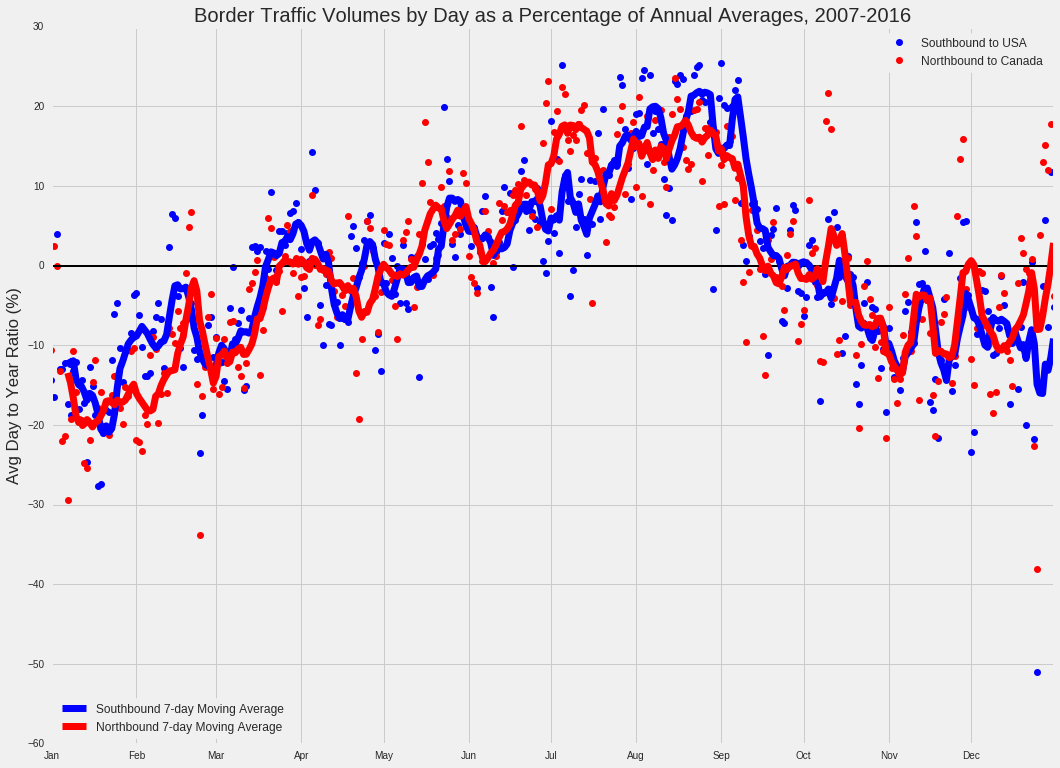

In [56]:
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_ticks = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', 
           '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', ]

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(16,12))
    
    
    plt.plot(graph_df['Norths Means'], 'bo')
    plt.plot(graph_df['Souths Means'], 'ro')
    plt.axhline(linewidth=2, color='black')
    line1, = plt.plot(graph_df['North Mean MA'], 'b', linewidth=7)
    line2, = plt.plot(graph_df['South Mean MA'], 'r', linewidth=7)
    
                                               
    first_legend = plt.legend(labels=['Southbound to USA', 'Northbound to Canada'], fontsize=12, frameon=True)
    ax = plt.gca().add_artist(first_legend)
    
    
    plt.legend(handles=[line1, line2], loc='lower left', fontsize=12, frameon=True, labels=['Southbound 7-day Moving Average', 'Northbound 7-day Moving Average'])
    plt.xticks(x_ticks, labels)
    plt.title('Border Traffic Volumes by Day as a Percentage of Annual Averages, 2007-2016')
    plt.ylabel('Avg Day to Year Ratio (%)')
    
    plt.savefig('fig.png', dpi=100)
    plt.show()

## NEXUS

In [62]:
delay_df = df[delays]

In [70]:
nexus_delay_df = get_df_from_mutual_columns(delay_df, nexus)
car_delay_df = get_df_from_mutual_columns(delay_df, cars)

In [82]:
nexus_list = nexus_delay_df.columns.tolist()
some_cars_list = []

for crossing in nexus_delay_df:
    some_cars_list.append(crossing.replace('NEXUS', "Cars"))

In [83]:
some_cars_list

['Delay (Pacific Highway North Cars)',
 'Delay (Pacific Highway South Cars)',
 'Delay (Peace Arch North Cars)',
 'Delay (Peace Arch South Cars)']

In [85]:
some_cars_df = get_df_from_mutual_columns(car_delay_df, some_cars_list)

In [89]:
len(some_cars_df) == len(nexus_delay_df)

True

In [101]:
nexus_vs_df = pd.concat([some_cars_df, nexus_delay_df], axis=1)
nexus_vs_df = nexus_vs_df.ix[nexus_vs_df.index.hour >= 6]
nexus_vs_df = nexus_vs_df.ix[nexus_vs_df.index.hour < 22]

In [126]:
grouped_by_day_nexus = nexus_vs_df.groupby(nexus_vs_df.index.hour).mean()

In [109]:
norths_list = ['Delay (Pacific Highway North Cars)',  'Delay (Peace Arch North Cars)',
               'Delay (Pacific Highway North NEXUS)', 'Delay (Peace Arch North NEXUS)']
souths_list = ['Delay (Pacific Highway South Cars)', 'Delay (Peace Arch South Cars)',
               'Delay (Pacific Highway South NEXUS)','Delay (Peace Arch South NEXUS)']

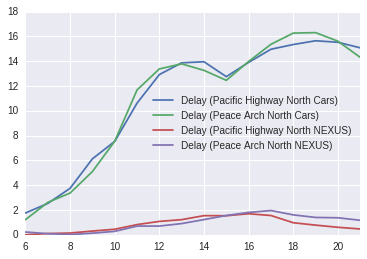

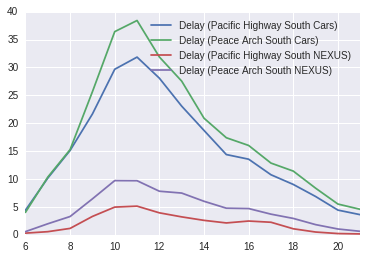

In [114]:
grouped_by_day_nexus[norths_list].plot()
grouped_by_day_nexus[souths_list].plot()

In [122]:
grouped_by_dayofweek_nexus = nexus_vs_df.groupby(nexus_vs_df.index.dayofweek).mean()
nexus_vs_df.groupby(nexus_vs_df.index.dayofweek).std()

,Delay (Pacific Highway North Cars),Delay (Pacific Highway South Cars),Delay (Peace Arch North Cars),Delay (Peace Arch South Cars),Delay (Pacific Highway North NEXUS),Delay (Pacific Highway South NEXUS),Delay (Peace Arch North NEXUS),Delay (Peace Arch South NEXUS)
0,14.600864,16.358364,16.686632,21.645367,3.132696,3.626674,8.406683,6.827230
1,11.153767,12.515967,12.874174,16.336142,2.337345,2.858720,3.067508,5.276699
2,12.940451,12.940588,14.402057,17.273549,2.450280,3.027510,2.921473,5.463779
3,11.871251,14.722903,13.861524,18.719571,2.527969,3.823766,3.172468,6.400558
4,12.767217,17.793800,14.822717,22.733814,3.200179,6.155798,3.142190,8.702811
5,16.904837,21.921645,19.604400,27.725483,3.565775,6.186445,3.806095,9.133468
6,19.255503,17.010879,20.756409,23.337536,3.890672,3.560217,5.187867,7.671329


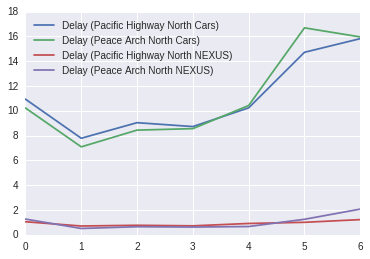

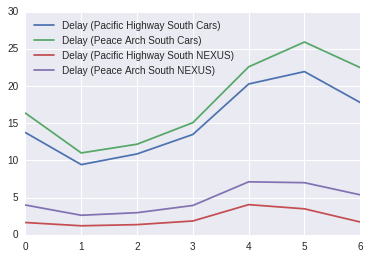

In [120]:
grouped_by_dayofweek_nexus[norths_list].plot()
grouped_by_dayofweek_nexus[souths_list].plot()

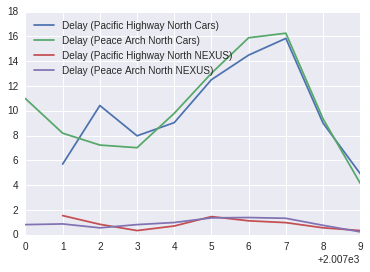

In [129]:
nexus_vs_df[norths_list].groupby(nexus_vs_df.index.year).mean().plot()

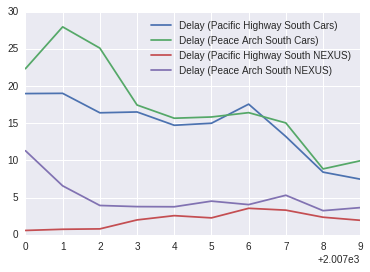

In [130]:
nexus_vs_df[souths_list].groupby(nexus_vs_df.index.year).mean().plot()

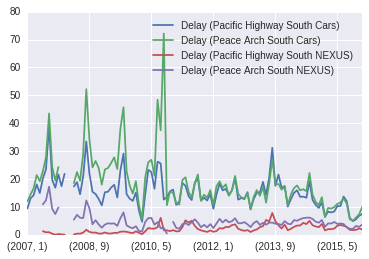

In [132]:
nexus_vs_df[souths_list].groupby([nexus_vs_df.index.year, nexus_vs_df.index.month]).mean().plot()

In [131]:
df.head()

,Availability (Lynden/Aldergrove North Cars),Availability (Lynden/Aldergrove North Trucks),Availability (Lynden/Aldergrove South Cars),Availability (Lynden/Aldergrove South Trucks),Availability (Pacific Highway North Bus),Availability (Pacific Highway North Cars),Availability (Pacific Highway North FAST),Availability (Pacific Highway North NEXUS),Availability (Pacific Highway North Trucks),Availability (Pacific Highway South Bus),...,Volume (Pacific Highway South FAST),Volume (Pacific Highway South NEXUS),Volume (Pacific Highway South Trucks),Volume (Peace Arch North Cars),Volume (Peace Arch North NEXUS),Volume (Peace Arch South Cars),Volume (Peace Arch South NEXUS),Volume (Sumas/Huntingdon North Cars),Volume (Sumas/Huntingdon North Trucks),Volume (Sumas/Huntingdon South Cars)
Starts,,,,,,,,,,,,,,,,,,,,,
2007-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,3,0,NaN,NaN,NaN
2007-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,2,0,NaN,NaN,NaN
2007-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,2,0,NaN,NaN,NaN
2007-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,NaN,NaN,0,0,NaN,NaN,NaN
2007-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,0,0,NaN,NaN,NaN


## Machine Learning

In [6]:
ml_df = df[['Delay (Pacific Highway South Cars)', 'Volume (Pacific Highway South Cars)']]

In [7]:
#ml_df.plot()

In [8]:
dollar_data = pd.read_csv('lookup.csv')

In [9]:
dollar_data = dollar_data.iloc[::-1]
dollar_data.index = pd.bdate_range("2007-01-01", "2016-01-15")
dollar_data.ix[dollar_data['Conversion rate'] == "Bank holiday", ['USD', 'Conversion rate', 'Reciprocal rate']] = pd.np
dollar_data = dollar_data.convert_objects(convert_numeric=True)
print dollar_data.dtypes
dollar_data = dollar_data.resample('5T', fill_method='bfill')

Date                object
USD                float64
Conversion rate    float64
Reciprocal rate    float64
dtype: object


/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [10]:
dollar_data = dollar_data[:len(dollar_data)-1]

In [11]:
len(ml_df) == len(dollar_data)

True

#### Gas Prices

In [12]:
gas_df = pd.read_excel('EMM_EPM0_PTE_NUS_DPGw (1).xls')
del gas_df['Date']

In [13]:
gas_df.index = (pd.date_range('2007-01-01', '2016-01-11', freq='W-MON'))

In [14]:
gas_df = gas_df.append(pd.DataFrame([[2.104]], index=[datetime.datetime(2016,01,14,23,59)], columns=gas_df.columns))

In [15]:
gas_df.tail()

,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
2015-12-21 00:00:00,2.133
2015-12-28 00:00:00,2.141
2016-01-04 00:00:00,2.135
2016-01-11 00:00:00,2.104
2016-01-14 23:59:00,2.104


In [16]:
gas_df = gas_df.resample('5T', fill_method='bfill')

In [17]:
ml_df.tail()

,Delay (Pacific Highway South Cars),Volume (Pacific Highway South Cars)
Starts,,
2016-01-14 23:35:00,0,3
2016-01-14 23:40:00,0,4
2016-01-14 23:45:00,2,2
2016-01-14 23:50:00,0,2
2016-01-14 23:55:00,0,2


In [18]:
len(gas_df), len(ml_df)

(950688, 950688)

#### Weather

In [19]:
w_columns = ['Date/Time',
 'Year',
 'Month',
 'Day',
 'Data Quality',
 'Max Temp',
 'Max Temp Flag',
 'Min Temp',
 'Min Temp Flag',
 'Mean Temp',
 'Mean Temp Flag',
 'Heat Deg Days',
 'Heat Deg Days Flag',
 'Cool Deg Days',
 'Cool Deg Days Flag',
 'Total Rain (mm)',
 'Total Rain Flag',
 'Total Snow (cm)',
 'Total Snow Flag',
 'Total Precip (mm)',
 'Total Precip Flag',
 'Snow on Grnd (cm)',
 'Snow on Grnd Flag',
 'Dir of Max Gust (10s deg)',
 'Dir of Max Gust Flag',
 'Spd of Max Gust (km/h)',
 'Spd of Max Gust Flag']


In [20]:
for year in range(2007, 2017):
    string = 'weather_df_'+ str(year)
    print ('= pd.read_csv("weather/eng-daily-0101{}-1231{}.csv", skiprows=25)'.format(str(year), str(year)))

= pd.read_csv("weather/eng-daily-01012007-12312007.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012008-12312008.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012009-12312009.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012010-12312010.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012011-12312011.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012012-12312012.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012013-12312013.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012014-12312014.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012015-12312015.csv", skiprows=25)
= pd.read_csv("weather/eng-daily-01012016-12312016.csv", skiprows=25)


In [21]:
w_07 = pd.read_csv("weather/eng-daily-01012007-12312007.csv", skiprows=25)
w_08 = pd.read_csv("weather/eng-daily-01012008-12312008.csv", skiprows=25)
w_09 = pd.read_csv("weather/eng-daily-01012009-12312009.csv", skiprows=25)
w_10 = pd.read_csv("weather/eng-daily-01012010-12312010.csv", skiprows=25)
w_11 = pd.read_csv("weather/eng-daily-01012011-12312011.csv", skiprows=25)
w_12 = pd.read_csv("weather/eng-daily-01012012-12312012.csv", skiprows=25)
w_13 = pd.read_csv("weather/eng-daily-01012013-12312013.csv", skiprows=25)
w_14 = pd.read_csv("weather/eng-daily-01012014-12312014.csv", skiprows=25)
w_15 = pd.read_csv("weather/eng-daily-01012015-12312015.csv", skiprows=25)
w_16 =  pd.read_csv("weather/eng-daily-01012016-12312016.csv", skiprows=25)

w_07.columns = w_columns
w_08.columns = w_columns
w_09.columns = w_columns
w_10.columns = w_columns
w_11.columns = w_columns
w_12.columns = w_columns
w_13.columns = w_columns
w_14.columns = w_columns
w_15.columns = w_columns
w_16.columns = w_columns

In [22]:
weather_df = pd.concat([w_07, w_08, w_09, w_10, w_11, w_12, w_13, w_14, w_15, w_16])

In [23]:
weather_df.index = pd.date_range("2007-01-01", "2016-12-31", freq="D")

In [24]:
weather_df = weather_df[:3302]

In [25]:
weather_df = weather_df.resample('5T', fill_method='ffill')

In [26]:
weather_df = weather_df[:len(weather_df) - 1]

In [27]:
len(weather_df) == len(ml_df)

True

In [28]:
dumb_columns = ['USD', 'Reciprocal rate',  'Total Snow Flag', 'Cool Deg Days',
 'Cool Deg Days Flag','Data Quality', 'Max Temp Flag', 'Min Temp Flag','Mean Temp Flag','Heat Deg Days Flag',
             'Cool Deg Days Flag',  'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
               'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag', 'Total Snow (cm)',
               'Total Rain (mm)', 'Date', 'Date/Time', 'Spd of Max Gust (km/h)']

In [29]:
final_df = pd.concat([ml_df, dollar_data, gas_df, weather_df], axis=1)
final_df = final_df.drop(final_df[dumb_columns], axis=1)

In [30]:
final_df['Hour'] = final_df.index.hour
final_df['Minute'] = final_df.index.minute
#final_df.dropna(inplace=True)

In [68]:
final_df['Day of Year'] = final_df.index.dayofyear
final_df['Day of Week'] = final_df.index.dayofweek

#### Start Analysis

In [69]:
final_df['Snow on Grnd (cm)'].fillna(0, inplace=True)
final_df.dropna(inplace=True)

In [70]:
final_df = final_df.convert_objects(convert_numeric=True)

/home/captain_eli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 724196 entries, 2007-01-01 00:05:00 to 2016-01-14 23:55:00
Data columns (total 17 columns):
Delay (Pacific Highway South Cars)                                                      724196 non-null float64
Volume (Pacific Highway South Cars)                                                     724196 non-null float64
Conversion rate                                                                         724196 non-null float64
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)    724196 non-null float64
Year                                                                                    724196 non-null int64
Month                                                                                   724196 non-null int64
Day                                                                                     724196 non-null int64
Max Temp                                                                     

In [80]:
features_l =  [
'Day of Year',
 'Conversion rate',
 u'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
 'Year',
 'Month',
 'Day',
 'Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Total Precip (mm)',
 'Snow on Grnd (cm)',
 'Minute']

In [81]:
def compute_r_squared(data, predictions):
    SST = ((data-np.mean(data))**2).sum()
    SSReg = ((predictions-data)**2).sum()
    r_squared = 1 - SSReg / SST
    
    return r_squared

In [82]:
import statsmodels.api as sm

def linear_regression(features, values):
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    
    print results.params
    
    return intercept, params

In [83]:
def predictions(dataframe):
    features = dataframe[features_l]
    dummy_1 = pd.get_dummies(dataframe['Day of Week'], prefix='Day_of_week')
    dummy_2 = pd.get_dummies(dataframe['Hour'], prefix='Hour')
    
    features = features.join(dummy_1)
    features = features.join(dummy_2)
    
    # Values
    values = dataframe['Delay (Pacific Highway South Cars)']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    predictions = intercept + np.dot(features, params)
    print predictions
    return predictions

In [ ]:
predictions = predictions(final_df)
print len(predictions)
compute_r_squared(final_df['Delay (Pacific Highway South Cars)'], predictions)